# Magyar üzemanyagfogyasztás 2015-2019

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2002-01-01 to 2023-01-01
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Benzin fogyasztás (kt)  22 non-null     int64
 1   Diesel fogyasztás (kt)  22 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes


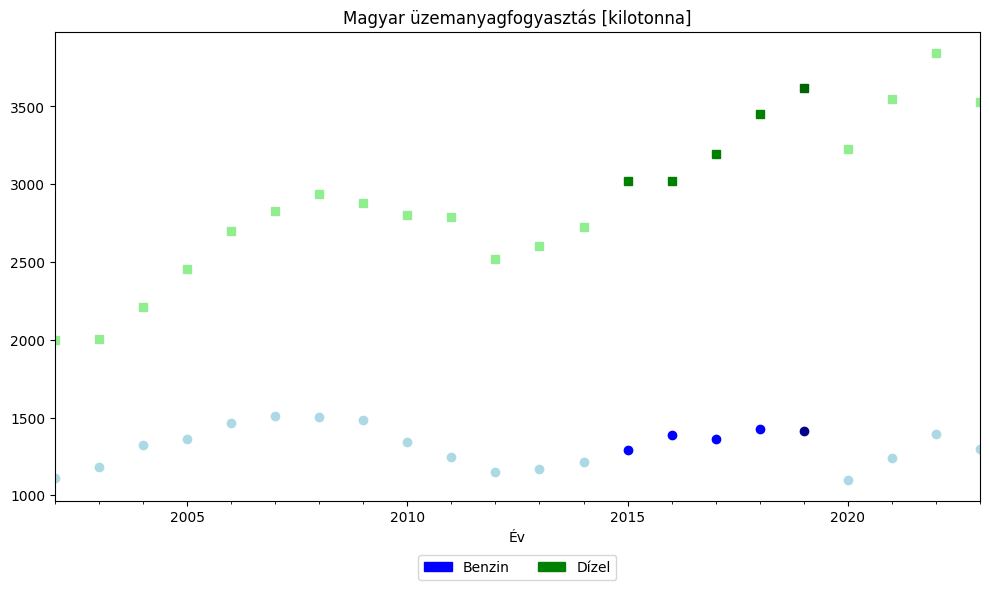

In [15]:
PROCESSED_DIR: Path = Path("../data/processed")

file_path = PROCESSED_DIR / "petrol_consumption.csv"
df = pd.read_csv(
    file_path,
    parse_dates=["Év"],
    index_col="Év",
)
df = df.sort_index(ascending=True)
df.info()
df.head()

df_pre = df.loc[:"2014"]
df_train = df.loc["2015":"2018"]
df_test = df.loc["2019"]
df_post = df.loc["2020":]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Magyar üzemanyagfogyasztás [kilotonna]")

df_pre.plot(style=['o', 's'], ax=ax, color=["lightblue", "lightgreen"], legend=False)
df_train.plot(style=['o', 's'], ax=ax, color=["blue", "green"], legend=False)
df_test.plot(style=['o', 's'], ax=ax, color=["darkblue", "darkgreen"], legend=False)
df_post.plot(style=['o', 's'], ax=ax, color=["lightblue", "lightgreen"], legend=False)

# Create custom legend entries
import matplotlib.patches as mpatches
benzin_patch = mpatches.Patch(color='blue', label='Benzin')
dizel_patch = mpatches.Patch(color='green', label='Dízel')

ax.legend(handles=[benzin_patch, dizel_patch], bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=2)
plt.tight_layout()
plt.savefig("../docs/abrak/petrol_consumption.png", dpi=300, bbox_inches='tight')
plt.show()